<a href="https://colab.research.google.com/github/Chetalam/AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the CSV file from your computer
uploaded = files.upload()




Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


In [ ]:

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


csv_path = 'Airplane_Crashes_and_Fatalities_Since_1908.csv'

df = pd.read_csv(csv_path, low_memory=False)
df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
# 3. Determine number of rows and columns
rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)




Number of rows: 5268
Number of columns: 13


In [ ]:
# 3. Display the last 75 rows
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


## 4. Handling Missing Data — Methods and Justifications

After detecting missing values using:
```python
df.isnull()
df.isna().any()
df.isna().sum()
```
we can decide how to treat them using pandas functions such as:
- `df.dropna()` – drops rows with any missing values  
- `df.dropna(axis='columns')` – drops entire columns with missing values  
- `df.fillna(0)` – fills all missing values with 0  
- `df.fillna(df.mean())` – replaces missing numeric values with their column mean  

---

### 🔹 Recommended Treatment per Column

| Column | Recommended Method | Justification |
|---------|--------------------|---------------|
| **Date** | `df.dropna(subset=['Date'])` | The date is essential for chronological analysis (e.g., trends over time). Rows missing dates cannot be used reliably and should be dropped. |
| **Time** | `df.fillna('Unknown')` | Time is not critical for numeric analysis, so we can fill missing times with “Unknown” to keep rows complete. |
| **Location** | `df.fillna('Unknown')` | Keeps all records even if location is missing — prevents data loss while maintaining usability for other analyses. |
| **Operator (Airline)** | `df.fillna('Unknown')` | Useful for grouping crashes by airline; filling ensures consistency instead of dropping valuable rows. |
| **Flight #** | `df.fillna('Unknown')` | Identifiers do not affect statistics; filling avoids null errors in text operations. |
| **Route** | `df.fillna('Unknown')` | Preserves data completeness for potential route-based exploration. |
| **Type (Aircraft Model)** | `df.fillna('Unknown')` | Keeps data rows intact while maintaining interpretability. |
| **Registration** | `df.fillna('Unknown')` | This column is descriptive; missing entries can safely be filled with a placeholder. |
| **Aboard** | `df.fillna(df['Aboard'].mean())` | Replaces missing numeric values with the mean number of passengers to maintain approximate totals without biasing extreme values. |
| **Fatalities** | `df.fillna(df['Fatalities'].mean())` | Mean imputation provides a balanced estimate without deleting rows. However, if accuracy is critical, NaN can be kept and excluded during calculations. |
| **Ground (people killed on the ground)** | `df.fillna(0)` | Missing likely means zero fatalities on the ground. |
| **Summary** | `df.fillna('No summary available')` | Maintains readability in textual analysis and avoids blank entries. |




In [ ]:
# 5. Create 'fatality_locations' dataframe
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()

fatality_locations['Aboard'] = pd.to_numeric(fatality_locations['Aboard'], errors='coerce')
fatality_locations['Fatalities'] = pd.to_numeric(fatality_locations['Fatalities'], errors='coerce')

fatality_locations.head()


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [ ]:
# 6. Determine the date of the highest number of recorded fatalities
max_idx = fatality_locations['Fatalities'].idxmax()
highest_fatality_date = fatality_locations.loc[max_idx, 'Date']
print("Date of highest number of fatalities:", highest_fatality_date)



Date of highest number of fatalities: 03/27/1977


Number of recorded crashes with 0 fatalities: 58


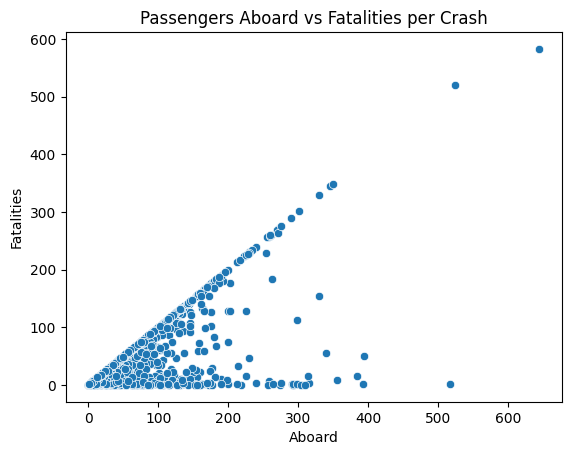

In [ ]:
# 7. Compare Aboard vs Fatalities with zero-fatality crashes

zero_fatal = (fatality_locations['Fatalities'] == 0).sum()
print("Number of recorded crashes with 0 fatalities:", zero_fatal)


sns.scatterplot(data=fatality_locations, x='Aboard', y='Fatalities')
plt.title('Passengers Aboard vs Fatalities per Crash')
plt.show()


In [ ]:
# 8. Split Location into Region with State/Country

split_cols = fatality_locations['Location'].astype(str).str.rsplit(',', n=1, expand=True)
fatality_locations['Region'] = split_cols[0].str.strip()
fatality_locations['State_Country'] = split_cols[1].str.strip()

fatality_locations[['Location', 'Region', 'State_Country']].head()

,Location,Region,State_Country
0,"Fort Myer, Virginia",Fort Myer,Virginia
1,"AtlantiCity, New Jersey",AtlantiCity,New Jersey
2,"Victoria, British Columbia, Canada","Victoria, British Columbia",Canada
3,Over the North Sea,Over the North Sea,None
4,"Near Johannisthal, Germany",Near Johannisthal,Germany


In [ ]:
# 9. Order by number of fatalities (desc) and select first 100
top100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top100.head(10)

,Date,Location,Aboard,Fatalities,Region,State_Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,"Mt. Osutaka, near Ueno Village",Japan
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
3240,08/19/1980,"Near Riyadh, Saudi Arabia",301.0,301.0,Near Riyadh,Saudi Arabia
3775,07/03/1988,"Over the Persian Gulf, near Bandar Abbas, Iran",290.0,290.0,"Over the Persian Gulf, near Bandar Abbas",Iran
4916,02/19/2003,"Near Shahdad, Iran",275.0,275.0,Near Shahdad,Iran
3137,05/25/1979,"Chicago O'Hare, Illinois",271.0,271.0,Chicago O'Hare,Illinois
3436,09/01/1983,"Near Sakhalin Island, Russia",269.0,269.0,Near Sakhalin Island,Russia


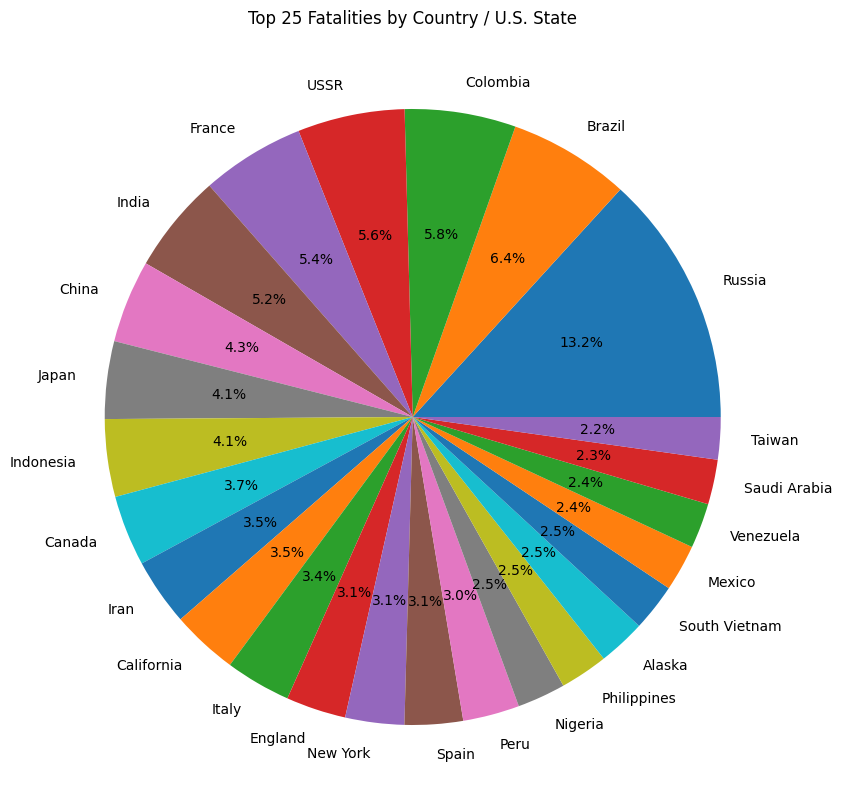

In [ ]:
# 10. Pie chart of top 25 fatalities per country/state
agg = fatality_locations.dropna(subset=['State_Country', 'Fatalities']) \
                        .groupby('State_Country')['Fatalities'] \
                        .sum() \
                        .sort_values(ascending=False) \
                        .head(25)

plt.figure(figsize=(10,10))
agg.plot.pie(autopct='%1.1f%%', ylabel='')
plt.title('Top 25 Fatalities by Country / U.S. State')
plt.show()